In [23]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

In [37]:
def get_center(points: list[int]) -> list:
    rows = [x[0] for x in points]
    cols = [x[1] for x in points]
    row_avg = sum(rows)/len(rows)
    col_avg = sum(cols)/len(cols)
    return [round(row_avg), round(col_avg)]

In [353]:
left_mat = np.ones((16,16)) * 100
right_mat = np.ones((16,16)) * 200

left = [[1, 8], [1, 14], [14,8], [14,14]]
right = [[1, 1], [1, 7], [14,1], [14,7]] 

for point in left:
    point = tuple(point)
    left_mat[point] = 255

for point in right:
    point = tuple(point)
    right_mat[point] = 255

left_image = Image.fromarray(left_mat)
right_image = Image.fromarray(right_mat)

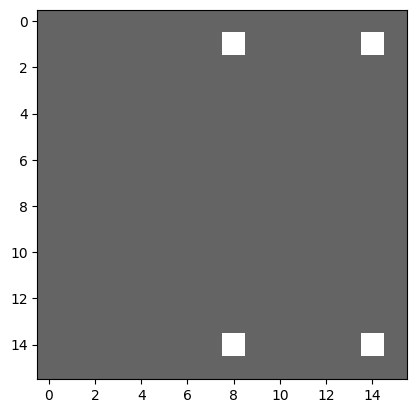

In [354]:
imshow(left_image)

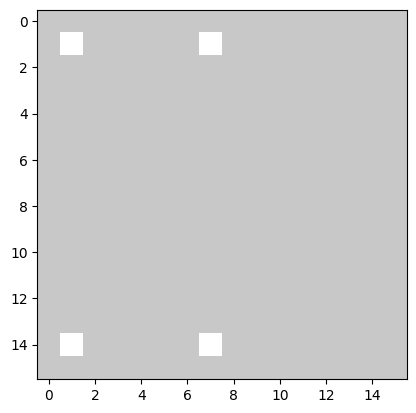

In [355]:
imshow(right_image)

In [356]:
A = np.zeros((2*len(right), 9))
for i in range(len(right)):
    idx = i * 2
    A[idx,3:6] = [*left[i], 1] # indices 3:6 = x,y,1
    A[idx+1,0:3] = [*left[i], 1] # indices 0:3 = x,y,1
    A[idx, 6:9] = [right[i][1] * left[i][0],
                   right[i][1] * left[i][1],
                   right[i][1] * -1]
    A[idx+1, 6:9] = [right[i][0] * left[i][0],
                   right[i][0] * left[i][1],
                   right[i][0] * -1]

A

array([[  0.,   0.,   0.,   1.,   8.,   1.,   1.,   8.,  -1.],
       [  1.,   8.,   1.,   0.,   0.,   0.,   1.,   8.,  -1.],
       [  0.,   0.,   0.,   1.,  14.,   1.,   7.,  98.,  -7.],
       [  1.,  14.,   1.,   0.,   0.,   0.,   1.,  14.,  -1.],
       [  0.,   0.,   0.,  14.,   8.,   1.,  14.,   8.,  -1.],
       [ 14.,   8.,   1.,   0.,   0.,   0., 196., 112., -14.],
       [  0.,   0.,   0.,  14.,  14.,   1.,  98.,  98.,  -7.],
       [ 14.,  14.,   1.,   0.,   0.,   0., 196., 196., -14.]])

In [357]:
U, D, Vt = np.linalg.svd(A)
H = Vt[-1].reshape(3,3)

In [341]:
def project_point(point: tuple, H: np.ndarray) -> tuple:
    homo_point = np.asarray([*point,1])
    projected = H@homo_point
    cartesian = projected/projected[2]
    cart_point = np.round(cartesian[:2], 2)
    return tuple(cart_point)

In [342]:
def blend(mat1: np.ndarray, mat2: np.ndarray, point1: tuple, point2: tuple) -> int:
    return round((mat1[point1] + mat2[point2])/2)


In [343]:
def contains(shape: tuple, point: tuple) -> bool:
    return (0 <= point[0] < shape[0]) and (0 <= point[1] < shape[1])

In [358]:
canvas = np.zeros((left_mat.shape[0], right_mat.shape[1]+left_mat.shape[1]))
canvas_points = zip(np.repeat(list(range(canvas.shape[0])),canvas.shape[1]), list(range(canvas.shape[1])) * canvas.shape[0])
for point in canvas_points:
    projection = project_point(point, H)
    if contains(left_mat.shape, point) and not contains(right_mat.shape, projection):
        canvas[point] = left_mat[point]
    elif contains(left_mat.shape, point) and contains(right_mat.shape, projection):
        canvas[point] = blend(left_mat, right_mat, point, tuple(map(int,projection)))
    elif not contains(left_mat.shape, point) and contains(right_mat.shape, projection):
        canvas[point] = right_mat[tuple(map(int,projection))]

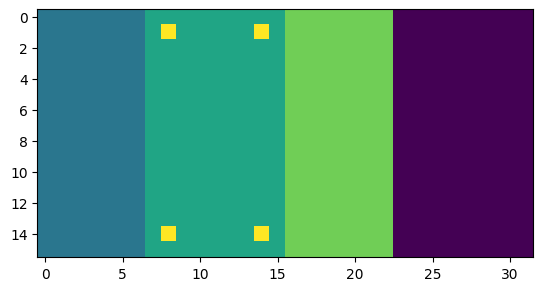

In [359]:
imshow(canvas)